# 图像金字塔

# 0.使用图像金字塔的原因

在通常情况下我们使用大小恒定的图像。但在某些情况下，我们需要使用**同一副图像的不同分辨率的部分**。例如，在搜索图像中的某些内容时，如脸部信息，并**不确定该对象在所述图像中的大小**。在这种情况下，我们需要**创建一组具有不同分辨率的相同图像**，并**在所有图像中搜索对象**。这些**具有不同分辨率的图像**被称为图像金字塔（因为当它们保持在堆叠中，底部具有最高分辨率图像而顶部具有最低分辨率图像时，它看起来像金字塔）

# 1. 图像金字塔简介

① 金字塔的**底层是比较大，越往上越小**，图像金字塔就是把图像组合成金字塔的形状。

② 图像金字塔可以做**图像特征提取**，做特征提取时有时可能**不光对原始输入**做特征提取，可能还会**对好几层图像金字塔**做特征提取。可能每一层特征提取的结果是不一样的，再**把特征提取的结果总结**在一起。

① 常用的两种图像金字塔形式：

- 高斯金字塔
- 拉普拉斯金字塔

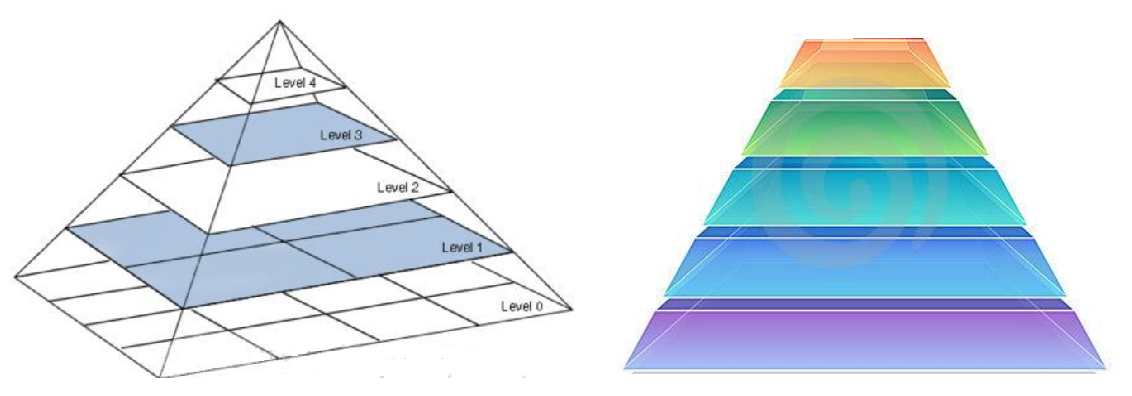

通过**去除较低级别（较高分辨率）图像**中的**连续行和列**来形成**高斯金字塔**中的**较高级别（低分辨率）**。然后，**较高级别的每个像素**由来自**基础级别**中的**5个像素的贡献**形成，具有**高斯权重**。通过这样做，M×N图像变为M/2 * N/2图像。因此面积减少到原始面积的**四分之一**

图像金字塔中的 4 个级别
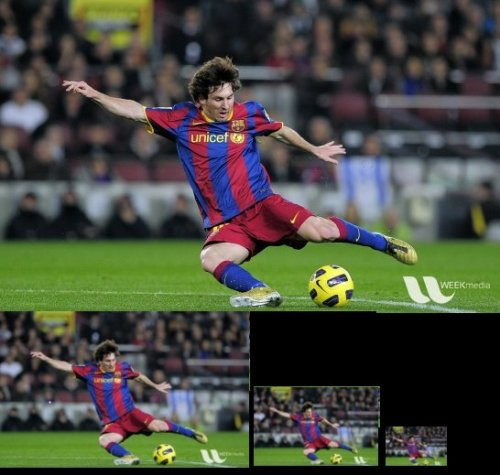

# 2. 高斯金字塔

## 2.1 向下采样方法 ( 缩小 )

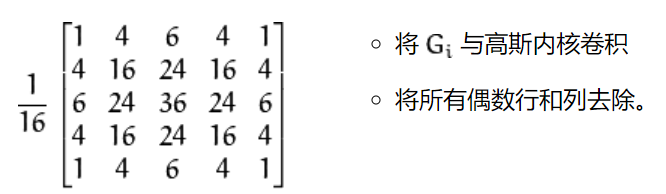

## 2.2 向上采样方法 ( 放大 )

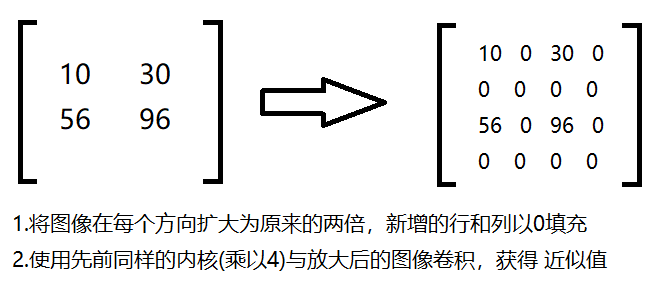

## 2.3 代码综合

In [1]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline  

def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [2]:
img = cv2.imread('01_Picture/09_AM.png')
cv_show(img,'img')
print(img.shape)

(442, 340, 3)


In [3]:
img = cv2.imread('01_Picture/09_AM.png')
up = cv2.pyrUp(img)
cv_show(up,'up')
print(up.shape)

(884, 680, 3)


In [4]:
img = cv2.imread('01_Picture/09_AM.png')
down = cv2.pyrDown(img)
cv_show(down,'down')
print(down.shape)

(221, 170, 3)


In [5]:
up = cv2.pyrUp(up)  # 上采样之后再上采样
cv_show(up,'up')
print(up.shape)

(1768, 1360, 3)


In [4]:
img = cv2.imread('01_Picture/09_AM.png')
up = cv2.pyrUp(img)
up_down = cv2.pyrDown(up) # 先上采样再下采样
cv_show(np.hstack((img,up_down)),'up_down')

原始图像，和先上采样再下采样得到图片有区别，后者会有**数据损失**
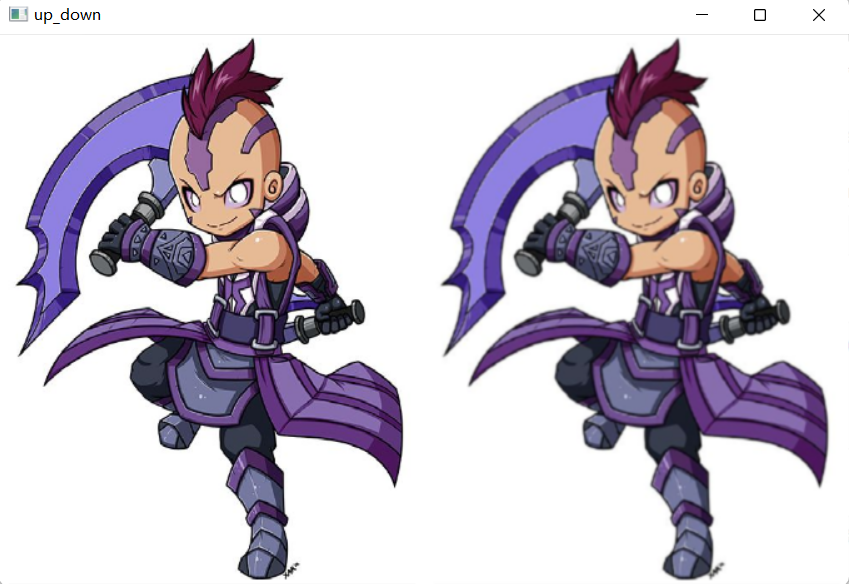

# 3. 拉普拉斯金字塔

① 拉普拉斯金字塔的每一层图像**尺寸不变**。

② 拉普拉斯金字塔的每一层操作都是**上一层处理后作为输入**，该输入减去该输入缩小放大后的图像，获得该层的输出。

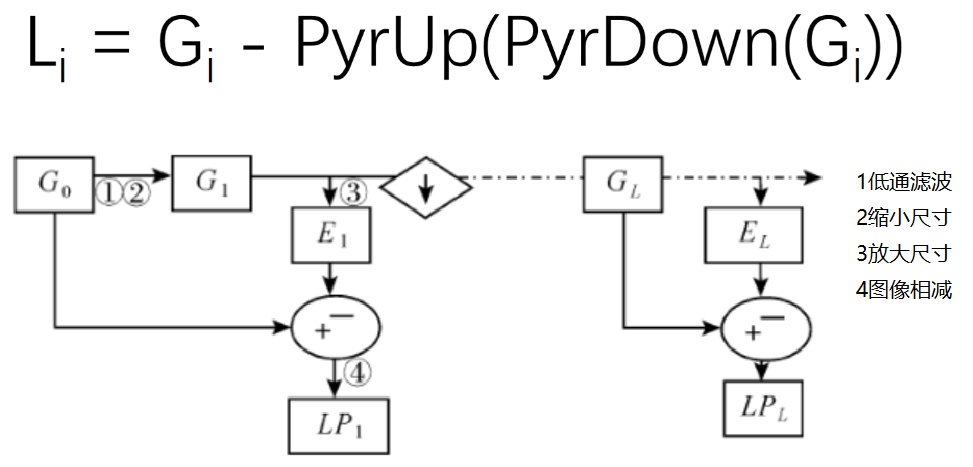

In [7]:
img = cv2.imread('01_Picture/09_AM.png')
domn = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
L_1 = img - down_up
cv_show(L_1,'L_1')
print(L_1.shape)

(442, 340, 3)
